# M-Score Calculations
The purpose of this document is to load in the data used to calculate the M-Score and to try to calculate the M-Scores of each company in the dataset per quarter. I did some big cleans; I eliminated all rows that had ANY Null values. It should be possible to impute some missing values, but I haven't had time to do it yet. It requires some care because I can't impute values based on the entire dataset. It needs to be done based on the company values that already exist. 

The first code cell was my attempt to download the data using the wrds library, but it takes a really long time to run on my computer so I just downloaded it directly from the website. The csv document names I used throughout this notebook are the same as the ones I uploaded into the GitHub, so if you want to do some work yourself, you can find them all in the Data folder.

Each cell should have some description in them in the form of comments. Sorry for the lack of markdown, I will proabably do it next time I work on this doc.

### WARNING:
Do **not** run all the cells in one go. Or if you do, be aware that you will probably get stuck in a very long running M-Score calculation. Depending on the order of the cells, it runs different versions of the M-Score calculations. It took a very long time for them to run so I downloaded them as csv's, so I don't have to do it again unless necessary. The numbers get very small and my computer is very weak so it was not happy with me.

In [7]:
#User created functions used throughout document

#created dataframes based on unique key for M-Score dataframes that have columns Key, Company, Ticker, Year, Date, Quarter, M-Score
def comp_m_df(df, key):

    return df[df["Key"] == key] 


In [ ]:
"""
#Wharton Research Data Services
#import module, created automated login
pip install wrds
import wrds 
db = wrds.Connection(wrds_username='kfontus3')
db.create_pgpass_file()
#just testing closing connection and reopening it. Don't have to reinput password!
#db.close()
db = wrds.Connection(wrds_username='kfontus3')

##snapshot = db.get_table(library='compsamp_snapshot', table='wrds_csq_unrestated')
var_names = ["gvkey", "rectq", "actq", "lctq", "atq", "ppentq", "dlttq", "dpq", "cogsq", "xsgaq", "oancfy", "ibq", "cisecglq"]
db.describe_table(library="compsamp_snapshot", table='wrds_csq_unrestated') #this takes forever to run bc it has 104k rows, so I downloaded it manually from the website

snapshot.shape
snapshot2 = snapshot[["gvkey", "rectq", "actq", "lctq", "atq", "ppentq", "dlttq", "dpq", "cogsq", "xsgaq", "oancfy", "ibq", "cisecglq"]]
snapshot2
"""

In [183]:
#!pip install pandas
import pandas as pd

m_data = pd.read_csv("M data 3.csv")
m_data.shape

(78625, 19)

In [184]:
m_data.head()

gvkey  fyearq    datadate   ACTQ    ATQ  CISECGLQ  COGSQ  DLTTQ    DPQ  \
0   1018    1982   9/30/1981    NaN    NaN       NaN  0.724    NaN  0.052   
1   1018    1982  12/31/1981    NaN    NaN       NaN  0.772    NaN  0.054   
2   1018    1982   3/31/1982    NaN    NaN       NaN  0.740    NaN  0.057   
3   1018    1982   6/30/1982  1.230  3.747       NaN  0.686  6.572  0.064   
4   1018    1983   9/30/1982  1.445  3.913       NaN  0.688  6.570  0.051   

     IBQ   LCTQ  OANCFY  PPENTQ  RECTQ  SALEQ  XSGAQ conm  sic  tic  
0  0.027    NaN     NaN     NaN    NaN  1.456  0.480  NaN  NaN  NaN  
1  0.097    NaN     NaN     NaN    NaN  1.574  0.488  NaN  NaN  NaN  
2 -0.398    NaN     NaN     NaN    NaN  1.130  0.570  NaN  NaN  NaN  
3  0.296  0.484     NaN   2.362  0.712  1.662  0.427  NaN  NaN  NaN  
4  0.010  0.643     NaN   2.313  0.691  1.299  0.391  NaN  NaN  NaN

In [4]:
m_data.describe()

gvkey        fyearq           ACTQ            ATQ  \
count   78625.000000  78625.000000   63596.000000   67186.000000   
mean    45225.223033   1995.698862     653.325254    1983.959785   
std     58690.246369     10.113799    3863.875625   12548.330512   
min      1018.000000   1973.000000      -0.168000      -0.250000   
25%      7692.000000   1988.000000       6.314000      14.667000   
50%     14282.000000   1996.000000      34.924000      83.839000   
75%     63726.000000   2004.000000     173.045500     504.212500   
max    311524.000000   2013.000000  101466.000000  721739.000000   

           CISECGLQ         COGSQ          DLTTQ           DPQ           IBQ  \
count  14664.000000  70993.000000   67391.000000  63529.000000  72775.000000   
mean       0.085395    284.540474     422.084094     24.169664     25.507324   
std       34.439396   1613.130672    4415.235776    130.734060    313.461168   
min    -2587.000000    -21.282000       0.000000    -71.173000 -18758.725000   
25%        0.000000      1.521000       0.030000      0.104000     -0.507000   
50%        0.000000     11.066000       4.725000      0.800000      0.242000   
75%        0.000000     71.852000      92.478000      5.430000      3.947000   
max      980.705000  56094.336000  422859.000000   5699.613000  22628.000000   

               LCTQ        OANCFY        PPENTQ          RECTQ         SALEQ  \
count  63818.000000  47994.000000  66787.000000   64578.000000  72766.000000   
mean     449.056330    139.252610    646.855061     359.472913    408.186195   
std     2735.197931   1040.359427   3050.399550    6431.264037   2146.022955   
min       -0.007000 -44236.938000      0.000000      -0.034000   -196.736000   
25%        3.124250     -1.168000      2.194500       1.220000      2.328000   
50%       16.901000      0.595000     16.899000      10.409000     17.726000   
75%       92.363750     17.905000    134.164500      60.547000    107.918000   
max    69209.357000  31626.000000  92887.497000  573439.000000  69878.625000   

              XSGAQ           sic  
count  58783.000000  48210.000000  
mean      78.536667   4160.270794  
std      480.867336   2135.356370  
min      -49.436000    100.000000  
25%        1.007000   2834.000000  
50%        4.242000   3672.000000  
75%       18.905000   5411.000000  
max    22654.688000   9997.000000

In [185]:
#the paper made its calculations without using securities, so we'll drop CISECGLQ
m_data.drop(columns="CISECGLQ", inplace=True)

#paper says data before 1976 Q4 is very sporiadic so we'll drop those rows
#m_data_b = m_data[m_data["fyearq"] >= 1977]
#m_data_b.head()

In [186]:
#There are a lot of null values
m_data_b.info()
m_data_b.columns

<class 'pandas.core.frame.DataFrame'>
Index: 76023 entries, 0 to 78624
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     76023 non-null  int64  
 1   fyearq    76023 non-null  int64  
 2   datadate  76023 non-null  object 
 3   ACTQ      62293 non-null  float64
 4   ATQ       65536 non-null  float64
 5   COGSQ     69435 non-null  float64
 6   DLTTQ     64990 non-null  float64
 7   DPQ       62026 non-null  float64
 8   IBQ       70213 non-null  float64
 9   LCTQ      62493 non-null  float64
 10  OANCFY    47994 non-null  float64
 11  PPENTQ    65168 non-null  float64
 12  RECTQ     63216 non-null  float64
 13  SALEQ     70233 non-null  float64
 14  XSGAQ     57519 non-null  float64
 15  conm      48241 non-null  object 
 16  sic       48210 non-null  float64
 17  tic       47012 non-null  object 
dtypes: float64(13), int64(2), object(3)
memory usage: 11.0+ MB


Index(['gvkey', 'fyearq', 'datadate', 'ACTQ', 'ATQ', 'COGSQ', 'DLTTQ', 'DPQ',
       'IBQ', 'LCTQ', 'OANCFY', 'PPENTQ', 'RECTQ', 'SALEQ', 'XSGAQ', 'conm',
       'sic', 'tic'],
      dtype='object')

In [187]:
#There are quite a few rows and companies that have no data at all so we need to get rid of thise
#not including identifier columns bc those seem to be empty for no reason sometimes

value_cols = ['ACTQ', 'ATQ', 'COGSQ', 'DLTTQ', 'DPQ',
       'IBQ', 'LCTQ', 'OANCFY', 'PPENTQ', 'RECTQ', 'SALEQ', 'XSGAQ']

all_na_check = m_data_b[value_cols].isnull().apply(lambda x: all(x), axis=1)
all_na_check.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [188]:
#gets rid of rows that have all null values
m_data_c = m_data_b[~all_na_check]
m_data_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70591 entries, 0 to 78624
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     70591 non-null  int64  
 1   fyearq    70591 non-null  int64  
 2   datadate  70591 non-null  object 
 3   ACTQ      62293 non-null  float64
 4   ATQ       65536 non-null  float64
 5   COGSQ     69435 non-null  float64
 6   DLTTQ     64990 non-null  float64
 7   DPQ       62026 non-null  float64
 8   IBQ       70213 non-null  float64
 9   LCTQ      62493 non-null  float64
 10  OANCFY    47994 non-null  float64
 11  PPENTQ    65168 non-null  float64
 12  RECTQ     63216 non-null  float64
 13  SALEQ     70233 non-null  float64
 14  XSGAQ     57519 non-null  float64
 15  conm      47150 non-null  object 
 16  sic       47122 non-null  float64
 17  tic       46014 non-null  object 
dtypes: float64(13), int64(2), object(3)
memory usage: 10.2+ MB


In [189]:
m_data_c["datadate"].unique()

array(['9/30/1981', '12/31/1981', '3/31/1982', '6/30/1982', '9/30/1982',
       '12/31/1982', '3/31/1983', '6/30/1983', '9/30/1983', '12/31/1983',
       '3/31/1984', '6/30/1984', '9/30/1984', '12/31/1984', '3/31/1985',
       '6/30/1985', '9/30/1985', '12/31/1985', '3/31/1986', '6/30/1986',
       '9/30/1986', '12/31/1986', '3/31/1987', '6/30/1987', '9/30/1987',
       '12/31/1987', '3/31/1988', '3/31/1981', '6/30/1981', '3/31/1977',
       '6/30/1977', '9/30/1977', '12/31/1977', '3/31/1978', '6/30/1978',
       '9/30/1978', '12/31/1978', '3/31/1979', '6/30/1979', '9/30/1979',
       '12/31/1979', '3/31/1980', '6/30/1980', '9/30/1980', '12/31/1980',
       '6/30/1988', '9/30/1988', '12/31/1988', '3/31/1989', '6/30/1989',
       '9/30/1989', '12/31/1989', '3/31/1990', '6/30/1990', '9/30/1990',
       '12/31/1990', '3/31/1991', '6/30/1991', '9/30/1991', '12/31/1991',
       '3/31/1992', '6/30/1992', '9/30/1992', '12/31/1992', '3/31/1993',
       '6/30/1993', '9/30/1993', '12/31/1993', '

In [191]:
#Creating a new array that is the year that the data reading is in, as opposed to the fiscal year, which differs for some companies
q_year = pd.to_datetime(m_data_c["datadate"]).dt.strftime('%Y')
q_year


0        1981
1        1981
2        1982
3        1982
4        1982
         ... 
78620    2012
78621    2012
78622    2012
78623    2013
78624    2013
Name: datadate, Length: 70591, dtype: object

In [193]:
#New column to reflect the true quarter year
m_data_c["year"] = q_year
m_data_c.head()

C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\703287310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data_c["year"] = q_year


gvkey  fyearq    datadate   ACTQ    ATQ  COGSQ  DLTTQ    DPQ    IBQ   LCTQ  \
0   1018    1982   9/30/1981    NaN    NaN  0.724    NaN  0.052  0.027    NaN   
1   1018    1982  12/31/1981    NaN    NaN  0.772    NaN  0.054  0.097    NaN   
2   1018    1982   3/31/1982    NaN    NaN  0.740    NaN  0.057 -0.398    NaN   
3   1018    1982   6/30/1982  1.230  3.747  0.686  6.572  0.064  0.296  0.484   
4   1018    1983   9/30/1982  1.445  3.913  0.688  6.570  0.051  0.010  0.643   

   OANCFY  PPENTQ  RECTQ  SALEQ  XSGAQ conm  sic  tic  year  
0     NaN     NaN    NaN  1.456  0.480  NaN  NaN  NaN  1981  
1     NaN     NaN    NaN  1.574  0.488  NaN  NaN  NaN  1981  
2     NaN     NaN    NaN  1.130  0.570  NaN  NaN  NaN  1982  
3     NaN   2.362  0.712  1.662  0.427  NaN  NaN  NaN  1982  
4     NaN   2.313  0.691  1.299  0.391  NaN  NaN  NaN  1982

In [203]:
#need to get rid of rows that do not adhere to March, Jum, Sept, Dec ends, because the paper didn't use them
q_months = pd.to_datetime(m_data_c["datadate"]).dt.month
m_data_d = m_data_c[q_months.isin([3,6,9,12])]
m_data_d[pd.to_datetime(m_data_c["datadate"]).dt.month.isin([1,4,7,10])]


C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\3906686468.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m_data_d[pd.to_datetime(m_data_c["datadate"]).dt.month.isin([1,4,7,10])]


Empty DataFrame
Columns: [gvkey, fyearq, datadate, ACTQ, ATQ, COGSQ, DLTTQ, DPQ, IBQ, LCTQ, OANCFY, PPENTQ, RECTQ, SALEQ, XSGAQ, conm, sic, tic, year]
Index: []

In [205]:
#need to have quarter numbers
quarters = pd.to_datetime(m_data_d["datadate"]).dt.quarter
m_data_d["quarters"] = quarters
m_data_d["YQ"] = pd.PeriodIndex(m_data_d["datadate"], freq="Q")
m_data_d.head()


C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\1944043076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data_d["quarters"] = quarters


C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\1944043076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data_d["YQ"] = pd.PeriodIndex(m_data_d["datadate"], freq="Q")


gvkey  fyearq    datadate   ACTQ    ATQ  COGSQ  DLTTQ    DPQ    IBQ   LCTQ  \
0   1018    1982   9/30/1981    NaN    NaN  0.724    NaN  0.052  0.027    NaN   
1   1018    1982  12/31/1981    NaN    NaN  0.772    NaN  0.054  0.097    NaN   
2   1018    1982   3/31/1982    NaN    NaN  0.740    NaN  0.057 -0.398    NaN   
3   1018    1982   6/30/1982  1.230  3.747  0.686  6.572  0.064  0.296  0.484   
4   1018    1983   9/30/1982  1.445  3.913  0.688  6.570  0.051  0.010  0.643   

   ...  PPENTQ  RECTQ  SALEQ  XSGAQ  conm sic  tic  year quarters      YQ  
0  ...     NaN    NaN  1.456  0.480   NaN NaN  NaN  1981        3  1981Q3  
1  ...     NaN    NaN  1.574  0.488   NaN NaN  NaN  1981        4  1981Q4  
2  ...     NaN    NaN  1.130  0.570   NaN NaN  NaN  1982        1  1982Q1  
3  ...   2.362  0.712  1.662  0.427   NaN NaN  NaN  1982        2  1982Q2  
4  ...   2.313  0.691  1.299  0.391   NaN NaN  NaN  1982        3  1982Q3  

[5 rows x 21 columns]

In [206]:
#see how many nulls exist right now
m_data_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57186 entries, 0 to 78624
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype        
---  ------    --------------  -----        
 0   gvkey     57186 non-null  int64        
 1   fyearq    57186 non-null  int64        
 2   datadate  57186 non-null  object       
 3   ACTQ      50017 non-null  float64      
 4   ATQ       52946 non-null  float64      
 5   COGSQ     56191 non-null  float64      
 6   DLTTQ     52473 non-null  float64      
 7   DPQ       50367 non-null  float64      
 8   IBQ       56863 non-null  float64      
 9   LCTQ      50171 non-null  float64      
 10  OANCFY    39304 non-null  float64      
 11  PPENTQ    52599 non-null  float64      
 12  RECTQ     51036 non-null  float64      
 13  SALEQ     56881 non-null  float64      
 14  XSGAQ     45581 non-null  float64      
 15  conm      38177 non-null  object       
 16  sic       38149 non-null  float64      
 17  tic       37112 non-null  object    

In [207]:
#function to make dataframes for separate keys
def comp_df(df, key):

    return df[df["gvkey"] == key] 

In [216]:
#The OANCFY/cashflow column has the most nulls, going to get rid of the companies that have any value column that is 100% empty, because we can't use them
#going to impute the rest
keys = m_data_d["gvkey"].unique()
m_data_e = m_data_d
for i in keys:
    my_df = comp_df(m_data_d, i)

    for j in value_cols:

        if my_df[j].isnull().all():
            m_data_e.drop(my_df.index, inplace=True)
            break



C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\4146639041.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data_e.drop(my_df.index, inplace=True)


In [224]:
#m_data_e.reset_index(inplace=True, drop=True)
m_data_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47099 entries, 0 to 47098
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype        
---  ------    --------------  -----        
 0   gvkey     47099 non-null  int64        
 1   fyearq    47099 non-null  int64        
 2   datadate  47099 non-null  object       
 3   ACTQ      43312 non-null  float64      
 4   ATQ       43905 non-null  float64      
 5   COGSQ     46413 non-null  float64      
 6   DLTTQ     43515 non-null  float64      
 7   DPQ       42656 non-null  float64      
 8   IBQ       46891 non-null  float64      
 9   LCTQ      43326 non-null  float64      
 10  OANCFY    36798 non-null  float64      
 11  PPENTQ    43762 non-null  float64      
 12  RECTQ     42806 non-null  float64      
 13  SALEQ     46960 non-null  float64      
 14  XSGAQ     41597 non-null  float64      
 15  conm      35993 non-null  object       
 16  sic       35967 non-null  float64      
 17  tic       34973 non-null  objec

### Next step I want to do, impute values with the MEDIAN of the column for each company

In [222]:
#imputing with median of each column for each company
keys2 = m_data_e["gvkey"].unique()
m_data_f = pd.DataFrame(columns=m_data_e.columns)

for i in keys2:
    my_df = comp_df(m_data_d, i)

    for j in value_cols:

        my_df[j] = my_df[j].fillna(my_df[j].median())

    m_data_f = pd.concat([m_data_f, my_df])



C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\778831164.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df[j] = my_df[j].fillna(my_df[j].median())
C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\778831164.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df[j] = my_df[j].fillna(my_df[j].median())
C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\778831164.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [223]:
#now we basically have a full data set, with more data than before
m_data_f.reset_index(inplace=True, drop=True)

m_data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47099 entries, 0 to 47098
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype        
---  ------    --------------  -----        
 0   gvkey     47099 non-null  object       
 1   fyearq    47099 non-null  object       
 2   datadate  47099 non-null  object       
 3   ACTQ      47099 non-null  float64      
 4   ATQ       47099 non-null  float64      
 5   COGSQ     47099 non-null  float64      
 6   DLTTQ     47099 non-null  float64      
 7   DPQ       47099 non-null  float64      
 8   IBQ       47099 non-null  float64      
 9   LCTQ      47099 non-null  float64      
 10  OANCFY    47099 non-null  float64      
 11  PPENTQ    47099 non-null  float64      
 12  RECTQ     47099 non-null  float64      
 13  SALEQ     47099 non-null  float64      
 14  XSGAQ     47099 non-null  float64      
 15  conm      35993 non-null  object       
 16  sic       35967 non-null  float64      
 17  tic       34973 non-null  objec

In [ ]:
"""
#There's still a good amount of nulls...especially in the cash flow column
#Going to start out by droping any rows that have any null values, will start out using this data set as it is still pretty full
any_na_check = m_data_b[value_cols].isnull().apply(lambda x: any(x), axis=1)
#m_data_full = m_data[value_cols].dropna(axis=0)
m_data_full = m_data_c[~any_na_check]
m_data_full.info()
"""

In [225]:
print("There are ", m_data_f["fyearq"].nunique(), "distinct years with the range", m_data_f["fyearq"].min(), "to", m_data_f["fyearq"].max(),"\n")
print("There are ", m_data_f["gvkey"].nunique(), "distinct companies.\n")


There are  37 distinct years with the range 1977 to 2013 

There are  1185 distinct companies.



In [214]:
#m_data_full.columns
column_names = ["key", "year", "q_end", "current_assets", "total_assets", "cost_of_goods_sold", "total_long_term_debt", "depreciation", "income", "current_liabilities", "cash_flow", "property_plant_equipment", "net_receivables", "net_sales", "sales_general_admin_expense", "company", "sic", "ticker", "year", "quarter_num", "year_quarter"]
pd.DataFrame(list(zip(m_data_e.columns, column_names)), columns=["Columns", "Names"])

Columns                        Names
0      gvkey                          key
1     fyearq                         year
2   datadate                        q_end
3       ACTQ               current_assets
4        ATQ                 total_assets
5      COGSQ           cost_of_goods_sold
6      DLTTQ         total_long_term_debt
7        DPQ                 depreciation
8        IBQ                       income
9       LCTQ          current_liabilities
10    OANCFY                    cash_flow
11    PPENTQ     property_plant_equipment
12     RECTQ              net_receivables
13     SALEQ                    net_sales
14     XSGAQ  sales_general_admin_expense
15      conm                      company
16       sic                          sic
17       tic                       ticker
18      year                         year
19  quarters                  quarter_num
20        YQ                 year_quarter

In [226]:
#I'm only now figuring out that some companies make their fiscal years different than the starndard Jan-Dec quarters...
#should put everyone on the same Jan-Dec Fiscal year
m_data_f.head(10)

gvkey fyearq    datadate    ACTQ     ATQ   COGSQ  DLTTQ    DPQ    IBQ  \
0  1115   1982  12/31/1981  60.862  77.216   4.217  0.278  2.726  0.517   
1  1115   1982   3/31/1982  60.862  77.216   5.691  0.278  2.726  1.093   
2  1115   1982   6/30/1982  60.862  77.216   7.518  0.278  2.726  1.483   
3  1115   1982   9/30/1982  35.781  42.752   6.889  1.662  2.726  1.753   
4  1115   1983  12/31/1982  67.309  83.144   8.846  2.740  2.726  1.617   
5  1115   1983   3/31/1983  61.385  70.969   8.299  1.340  2.726  1.665   
6  1115   1983   6/30/1983  63.215  73.856   8.532  1.102  2.726  0.956   
7  1115   1983   9/30/1983  67.180  81.571   9.430  1.450  2.726  0.567   
8  1115   1984  12/31/1983  67.309  83.144   6.800  2.740  2.726 -3.519   
9  1115   1984   3/31/1984  71.647  89.009  10.271  0.376  2.726 -5.931   

     LCTQ  ...  PPENTQ   RECTQ   SALEQ   XSGAQ  conm sic  tic  year quarters  \
0  34.164  ...   8.022  25.740   9.300   3.982   NaN NaN  NaN  1981        4   
1  34.164  ...   8.022  25.740  12.116   4.499   NaN NaN  NaN  1982        1   
2  34.164  ...   8.022  25.740  15.373   5.249   NaN NaN  NaN  1982        2   
3  11.328  ...   6.577  14.747  16.011   6.440   NaN NaN  NaN  1982        3   
4  30.056  ...  13.474  19.635  18.581   7.274   NaN NaN  NaN  1982        4   
5  17.421  ...   8.540  19.499  17.493   7.708   NaN NaN  NaN  1983        1   
6  19.091  ...   9.597  20.083  18.289   8.548   NaN NaN  NaN  1983        2   
7  25.142  ...  12.008  22.502  18.746   9.780   NaN NaN  NaN  1983        3   
8  30.056  ...  13.474  19.635  12.032  11.708   NaN NaN  NaN  1983        4   
9  43.926  ...  15.023  22.496  16.826  12.014   NaN NaN  NaN  1984        1   

       YQ  
0  1981Q4  
1  1982Q1  
2  1982Q2  
3  1982Q3  
4  1982Q4  
5  1983Q1  
6  1983Q2  
7  1983Q3  
8  1983Q4  
9  1984Q1  

[10 rows x 21 columns]

### May need to change this. The M-Score paper excludes firms that do not use traditional quarter ends (ie fiscal year ends in December).

In [22]:
#Some rows have zero values, which can be inaccurate, so to start I'll eliminate those rows
#need to drop rows if there are zeros
#m_data_full_0 = m_data_full[~(m_data_full == 0).any(axis=1)]
#m_data_full_0 = m_data_full[(m_data_full == 0.0).any(axis=1)]
#m_data_full_0.reset_index(inplace=True, drop=True)
#m_data_full_0.head()

gvkey  fyearq   datadate     ACTQ      ATQ   COGSQ  DLTTQ    DPQ    IBQ  \
0   1115    1996  9/30/1996  134.832  186.628  39.517  0.401  2.235  4.805   
1   1115    1997  9/30/1997  149.003  205.477  42.553  0.308  2.491  6.027   
2   1115    1998  9/30/1998  189.128  265.057  49.447  0.079  3.644  3.700   
3   1115    1999  9/30/1999  139.172  239.662  56.063  1.150  7.078 -3.471   
4   1151    1987  4/30/1988   10.062   16.767   2.721  0.524  0.245 -0.238   

      LCTQ  ...  PPENTQ    RECTQ   SALEQ   XSGAQ                   conm  \
0   80.512  ...   8.393   80.654  64.925  16.957      ADAC LABORATORIES   
1   64.327  ...  11.555   99.495  72.480  19.237      ADAC LABORATORIES   
2   88.678  ...  11.769  127.590  86.941  23.030      ADAC LABORATORIES   
3  128.441  ...  15.555   80.393  84.839  30.143      ADAC LABORATORIES   
4    8.215  ...   2.216    3.215   6.505   3.144  AEQUITRON MEDICAL INC   

      sic   tic  year quarters      YQ  
0  3844.0  ADAC  1996        3  1996Q3  
1  3844.0  ADAC  1997        3  1997Q3  
2  3844.0  ADAC  1998        3  1998Q3  
3  3844.0  ADAC  1999        3  1999Q3  
4  3693.0  AQTN  1988        2  1988Q2  

[5 rows x 21 columns]

In [22]:
#print(m_data_full.shape)
#print(m_data_full_0.shape)

(37745, 21)
(26128, 21)


In [23]:
#In order to get some of the m-values, it requires a higher precision leve. Otherwise we get a NaN which is bad
#attempting to fix this with this precision package
#!pip install mpmath
#from mpmath import *

In [26]:
#testing out the package
#print(50-(100/3))
#mp.fdiv(100,2) - mp.fdiv(mp.fdiv(100,3), 1)

16.666666666666664


mpf('16.666666666666664')

In [100]:
#using this blocl to check the precision
#print(mp)

Mpmath settings:
  mp.prec = 33223             [default: 53]
  mp.dps = 10000              [default: 15]
  mp.trap_complex = False     [default: False]


In [103]:
"""
#This cell code has the calculations and definitions for M-Score and its components using the high precion

#create functions for each variable needed to calculate M-Score
#dft will be the row of the current t
#dft_1 will be the row of t-1

#10000 was the last one I was able to get to run, but there were still NaNs
#100000 I let run for 30 minutes, and it didn't even get close
mp.dps = 20000
mp.pretty= False

#Days Sales in Receivables
def DSRI(dft, dft_1):
    #x = dft["RECTQ"]/dft["SALEQ"]
    #y = dft_1["RECTQ"]/dft_1["SALEQ"]
    #return x/y
    x = mp.fdiv(dft["RECTQ"],dft["SALEQ"])
    y = mp.fdiv(dft_1["RECTQ"],dft_1["SALEQ"])
    return mp.fdiv(x,y)

#Gross Margin index
def GMI(dft,dft_1):
    #x = (dft_1["SALEQ"]-dft_1["COGSQ"])/dft_1["SALEQ"]
    #y = (dft["SALEQ"]-dft["COGSQ"])/dft["SALEQ"]
    #return x/y
    x = mp.fdiv(dft_1["SALEQ"]-dft_1["COGSQ"],dft_1["SALEQ"])
    y = mp.fdiv(dft["SALEQ"]-dft["COGSQ"],dft["SALEQ"])
    return mp.fdiv(x,y)

#Asset Quality Index
def AQI(dft,dft_1):
    #x = 1 - (dft["ACTQ"] + dft["PPENTQ"])/dft["ATQ"]
    #y = 1 - (dft_1["ACTQ"] + dft_1["PPENTQ"])/dft_1["ATQ"]
    #return x/y
    x = mp.fsub(1,  mp.fdiv(mp.fadd(dft["ACTQ"], dft["PPENTQ"]),dft["ATQ"]))
    y = mp.fsub(1,  mp.fdiv(mp.fadd(dft_1["ACTQ"], dft_1["PPENTQ"]),dft_1["ATQ"]))
    return mp.fdiv(x,y)

#Sales Growth Index
def SGI(dft,dft_1):
    #return dft["SALEQ"]/dft_1["SALEQ"]
    return mp.fdiv(dft["SALEQ"],dft_1["SALEQ"])

#Depreciation Index
def DEPI(dft,dft_1):
    #x = dft_1["DPQ"]/(dft_1["PPENTQ"] + dft_1["DPQ"])
    #y = dft["DPQ"]/(dft["PPENTQ"] + dft["DPQ"])
    #return x/y
    x = mp.fdiv(dft_1["DPQ"],(dft_1["PPENTQ"] + dft_1["DPQ"]))
    y = mp.fdiv(dft["DPQ"],(dft["PPENTQ"] + dft["DPQ"]))
    return mp.fdiv(x,y)



#Sales, General, and Admin expenses
def SGAI(dft,dft_1):
    #return (dft["XSGAQ"]/dft["SALEQ"])/(dft_1["XSGAQ"]/dft_1["SALEQ"])
    return mp.fdiv(mp.fdiv(dft["XSGAQ"],dft["SALEQ"]),mp.fdiv(dft_1["XSGAQ"],dft_1["SALEQ"]))

#Leverage Index
def LVGI(dft, dft_1):
    #x = (dft["LCTQ"] + dft["DLTTQ"])/dft["ATQ"]
    #y = (dft_1["LCTQ"] + dft_1["DLTTQ"])/dft_1["ATQ"]
    #return x/y
    x = mp.fdiv(dft["LCTQ"] + dft["DLTTQ"],dft["ATQ"])
    y = mp.fdiv(dft_1["LCTQ"] + dft_1["DLTTQ"],dft_1["ATQ"])
    return mp.fdiv(x,y)

#Total Accrual to Total Assets
def TATA(dft):
    #return (dft["IBQ"] - dft["OANCFY"])/dft["ATQ"]
    return mp.fdiv(dft["IBQ"] - dft["OANCFY"],dft["ATQ"])

#M-Score for time t
def M(dft, dft_1):
    return -4.84 + 0.92*DSRI(dft, dft_1) \
                 + 0.528*GMI(dft, dft_1) \
                 + 0.404*AQI(dft, dft_1) \
                 + 0.892*SGI(dft, dft_1) \
                 + 0.115*DEPI(dft, dft_1) \
                 - 0.172*SGAI(dft, dft_1) \
                 - 0.327*LVGI(dft, dft_1) \
                 + 4.679*TATA(dft)

"""                 


In [46]:
#import math

In [227]:
#These are the calculations for m-score and its components using regular algebra. It results in a bunch of nulls

#create functions for each variable needed to calculate M-Score
#dft will be the row of the current t
#dft_1 will be the row of t-1

#Days Sales in Receivables
def DSRI(dft, dft_1):
    x = dft["RECTQ"]/dft["SALEQ"]
    y = dft_1["RECTQ"]/dft_1["SALEQ"]
    #return exp(math.log(x) - math.log(y))
    #return exp(x/y)
    return x/y
    

#Gross Margin index
def GMI(dft,dft_1):
    x = (dft_1["SALEQ"]-dft_1["COGSQ"])/dft_1["SALEQ"]
    y = (dft["SALEQ"]-dft["COGSQ"])/dft["SALEQ"]
    #return exp(math.log(x) - math.log(y))
    #return exp(x/y)
    return x/y


#Asset Quality Index
def AQI(dft,dft_1):
    x = 1 - (dft["ACTQ"] + dft["PPENTQ"])/dft["ATQ"]
    y = 1 - (dft_1["ACTQ"] + dft_1["PPENTQ"])/dft_1["ATQ"]
    #return exp(math.log(x) - math.log(y))
    #return exp(x/y)
    return x/y
    

#Sales Growth Index
def SGI(dft,dft_1):
    x = dft["SALEQ"]
    y = dft_1["SALEQ"]
    #return exp(math.log(x) - math.log(y))
    #return exp(x/y)
    return x/y
    

#Depreciation Index
def DEPI(dft,dft_1):
    x = dft_1["DPQ"]/(dft_1["PPENTQ"] + dft_1["DPQ"])
    y = dft["DPQ"]/(dft["PPENTQ"] + dft["DPQ"])
    #return  exp(math.log(x) - math.log(y))
    #return exp(x/y)
    return x/y
  



#Sales, General, and Admin expenses
def SGAI(dft,dft_1):
    x = (dft["XSGAQ"]/dft["SALEQ"])
    y = (dft_1["XSGAQ"]/dft_1["SALEQ"])
    #return  exp(math.log(x) - math.log(y))
    #return exp(x/y)
    return x/y

#Leverage Index
def LVGI(dft, dft_1):
    x = (dft["LCTQ"] + dft["DLTTQ"])/dft["ATQ"]
    y = (dft_1["LCTQ"] + dft_1["DLTTQ"])/dft_1["ATQ"]
    #return exp(math.log(x) - math.log(y))
    #return exp(x/y)
    return x/y


#Total Accrual to Total Assets
def TATA(dft):
    x = (dft["IBQ"] - dft["OANCFY"])
    y = dft["ATQ"]
    #return exp(x/y)
    return x/y


#M-Score for time t
def M(dft, dft_1):
    return -4.84 + 0.92*DSRI(dft, dft_1) \
                 + 0.528*GMI(dft, dft_1) \
                 + 0.404*AQI(dft, dft_1) \
                 + 0.892*SGI(dft, dft_1) \
                 + 0.115*DEPI(dft, dft_1) \
                 - 0.172*SGAI(dft, dft_1) \
                 - 0.327*LVGI(dft, dft_1) \
                 + 4.679*TATA(dft)


#This did not work :)
"""
#M-Score for time t
def M(dft, dft_1):
    return -4.84 + 0.92*math.log(DSRI(dft, dft_1)) \
                 + 0.528*math.log(GMI(dft, dft_1)) \
                 + 0.404*math.log(AQI(dft, dft_1)) \
                 + 0.892*math.log(SGI(dft, dft_1)) \
                 + 0.115*math.log(DEPI(dft, dft_1)) \
                 - 0.172*math.log(SGAI(dft, dft_1)) \
                 - 0.327*math.log(LVGI(dft, dft_1)) \
                 + 4.679*math.log(TATA(dft))
"""


'\n#M-Score for time t\ndef M(dft, dft_1):\n    return -4.84 + 0.92*math.log(DSRI(dft, dft_1))                  + 0.528*math.log(GMI(dft, dft_1))                  + 0.404*math.log(AQI(dft, dft_1))                  + 0.892*math.log(SGI(dft, dft_1))                  + 0.115*math.log(DEPI(dft, dft_1))                  - 0.172*math.log(SGAI(dft, dft_1))                  - 0.327*math.log(LVGI(dft, dft_1))                  + 4.679*math.log(TATA(dft))\n'

In [ ]:
#This was me trying to figure out f I was getting the correct values, it seems like I was
-4.84 + (.92*1.174) + (.528*1.039) + (0.404*-1.026) + (0.892*1.002) + (.115*0.988) - (0.172*0.9898) - (0.327*0.9705) + (4.679*0.069)

-2.7831760999999995

In [228]:
#the M-score needs to be calculated for each company, so we'll make a dataframe based on the key
comp_keys = m_data_f["gvkey"].unique()

In [230]:
#need the M-scores for each calendar quarter
# m_data_f has the most complete set of data yet

list_of_rows =[]
for i in comp_keys:
    k_df = comp_df(m_data_f, i)
    k_df = k_df.reset_index(drop=True)

    for index, row in k_df.iterrows():
        if index == 0: continue
        

        score = M(k_df.iloc[index], k_df.iloc[index-1])

        new_row = [row["gvkey"], row["conm"], row["tic"], row["year"], row["datadate"], row["YQ"], score]
        list_of_rows.append(new_row)


m_score_df = pd.DataFrame(list_of_rows, columns=["Key", "Company", "Ticker", "Year", "Date", "Quarter", "M-Score"])
m_score_df.head()



C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\2037771918.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return x/y
C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\2037771918.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  return x/y


C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\2037771918.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  x = dft["RECTQ"]/dft["SALEQ"]
C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\2037771918.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  y = (dft["SALEQ"]-dft["COGSQ"])/dft["SALEQ"]
C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\2037771918.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  x = (dft["XSGAQ"]/dft["SALEQ"])
C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\2037771918.py:81: RuntimeWarning: invalid value encountered in scalar subtract
  return -4.84 + 0.92*DSRI(dft, dft_1) \
C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\2037771918.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  y = dft_1["RECTQ"]/dft_1["SALEQ"]
C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\2037771918.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return x/y
C:\Users\Kerstin\AppData

Key Company Ticker  Year        Date Quarter   M-Score
0  1115     NaN    NaN  1982   3/31/1982  1982Q1 -2.560610
1  1115     NaN    NaN  1982   6/30/1982  1982Q2 -2.553592
2  1115     NaN    NaN  1982   9/30/1982  1982Q3 -3.468174
3  1115     NaN    NaN  1982  12/31/1982  1982Q4 -1.455851
4  1115     NaN    NaN  1983   3/31/1983  1983Q1 -2.780615

In [232]:
#use this cell when all errors are dealth with
#saving M-score calculations to csv 
m_score_df.to_csv("M_score3.csv", encoding='utf-8', index=False,header=True)

In [235]:
#saving data we used to calculate above m-score to a csv
m_data_f.to_csv("M data 4.csv", encoding='utf-8', index=False,header=True)

In [233]:
#whenever the m-score function is stopped by a zero division error, this tells us where it stopped
#m_data_full_0.head(2)
list_of_rows[-1]
len(list_of_rows)

45914

In [91]:
#m calc with exp(x/y) ran for 213 min and got to 621/26128 rows
#m_attempt1 = pd.DataFrame(list_of_rows, columns=["Key", "Company", "Ticker", "Year", "Quarter", "M-Score"])
#m_attempt1.to_csv('M_score1.csv', encoding='utf-8', index=False,header=True)

In [98]:
#m calc with no math transformations gets a result of 25028/26123 which makes sense since we don't do a calculation for the first row of all 1369 companies
#runs in less than 30 min
#unfortunately there are 349 null values, but in the grand scheme of things this could be ok, maybe can impute?
#m_attempt2 = pd.DataFrame(list_of_rows, columns=["Key", "Company", "Ticker", "Year", "Quarter", "M-Score"])
#m_attempt2.info()
#m_attempt2.to_csv('M_score2.csv', encoding='utf-8', index=False,header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25028 entries, 0 to 25027
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype        
---  ------   --------------  -----        
 0   Key      25028 non-null  int64        
 1   Company  23538 non-null  object       
 2   Ticker   22830 non-null  object       
 3   Year     25028 non-null  object       
 4   Quarter  25028 non-null  period[Q-DEC]
 5   M-Score  24679 non-null  float64      
dtypes: float64(1), int64(1), object(3), period[Q-DEC](1)
memory usage: 1.1+ MB


In [ ]:
#should do one more attempt with the high degree of precision to see if maybe we get less nulls

#20000 digits only gets 1601 rows done with fter hours of running, so I'm going to leave it for now

In [ ]:
#This is where I want to store the non-precision math m_score calculations
#temp = m_score_df[~m_score_df["M-Score"].isna()]
#temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24679 entries, 0 to 25027
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype        
---  ------   --------------  -----        
 0   Key      24679 non-null  int64        
 1   Company  23229 non-null  object       
 2   Ticker   22525 non-null  object       
 3   Year     24679 non-null  object       
 4   Quarter  24679 non-null  period[Q-DEC]
 5   M-Score  24679 non-null  float64      
dtypes: float64(1), int64(1), object(3), period[Q-DEC](1)
memory usage: 1.0+ MB


In [ ]:
#This was a test to figure out what was wrong with the function
#The problem is that specifically the AQI calculations results in numbers so small that they read as zeros, which leads to zeros in the denominator
#M(m_data_full_0.iloc[1643], m_data_full_0.iloc[1642])

C:\Users\Kerstin\AppData\Local\Temp/ipykernel_17496/3612848250.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return x/y


nan

### Frome here on, I am loading in the csv with the m-score data and doing imputations with it

In [236]:
#There are 349 null M-scores, probably infinities since we were dividing by very snall numers in some cases. I'll try to impute based on surrounding M-scores
#This needs to be divided by company tho to make sure it is accurate
M = pd.read_csv("M_score3.csv")
M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45914 entries, 0 to 45913
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Key      45914 non-null  int64  
 1   Company  35904 non-null  object 
 2   Ticker   34897 non-null  object 
 3   Year     45914 non-null  int64  
 4   Date     45914 non-null  object 
 5   Quarter  45914 non-null  object 
 6   M-Score  40789 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.5+ MB


In [237]:
M[M["M-Score"].isna()].head()

Key            Company Ticker  Year        Date Quarter  M-Score
15   1115                NaN    NaN  1985  12/31/1985  1985Q4      NaN
16   1115                NaN    NaN  1986   3/31/1986  1986Q1      NaN
21   1115  ADAC LABORATORIES   ADAC  1987   6/30/1987  1987Q2      NaN
279  1265                NaN    NaN  1984   3/31/1984  1984Q1      NaN
280  1265                NaN    NaN  1984   6/30/1984  1984Q2      NaN

In [242]:
#It seems that there are some firms that have a large number of NaN values
#If more than half of the rows for a company is NaN, then we won't include the company. I don't think its worth it in the long run

list_of_rows_m =[]
keys_m = M.Key.unique()

#M_full = pd.DataFrame(columns=M.columns)
M_red = M

for i in keys_m:
    k_df = comp_m_df(M, i)

    if sum(k_df["M-Score"].isna()) > len(k_df)/2:
        M_red = M_red.drop(k_df.index)
        continue

        



M_red.reset_index(inplace=True, drop=True);

In [243]:
#will use this one to impute
M_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42278 entries, 0 to 42277
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Key      42278 non-null  int64  
 1   Company  33259 non-null  object 
 2   Ticker   32307 non-null  object 
 3   Year     42278 non-null  int64  
 4   Date     42278 non-null  object 
 5   Quarter  42278 non-null  object 
 6   M-Score  40210 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.3+ MB


In [254]:
M_red.iloc[0]

Key             1115
Company          NaN
Ticker           NaN
Year            1982
Date       3/31/1982
Quarter       1982Q1
M-Score     -2.56061
Name: 0, dtype: object

In [317]:
#going to impute by putting in median, will also replace the scores that have an absolute value less than or equal to 10

keys_m2 = M_red["Key"].unique()

M_full = pd.DataFrame(columns=M_red.columns)

for i in keys_m2:
    k_df = comp_m_df(M_red, i).reset_index(drop=True)
    #print(k_df)


    #med = k_df["M-Score"].median()
    k_df["M-Score"].replace([np.inf, -np.inf], 100, inplace=True)
    mask = abs(k_df["M-Score"]) > 5 
    k_df.loc[mask, "M-Score"] = np.nan
  
    
    k_df["M-Score"].ffill(axis=0,inplace=True)
    k_df["M-Score"].bfill(axis=0, inplace=True)
    M_full = pd.concat([M_full, k_df])

M_full.reset_index(inplace=True, drop=True)


C:\Users\Kerstin\AppData\Local\Temp\ipykernel_9272\1339612832.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  M_full = pd.concat([M_full, k_df])


In [304]:
M_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42278 entries, 0 to 42277
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Key      42278 non-null  object 
 1   Company  33259 non-null  object 
 2   Ticker   32307 non-null  object 
 3   Year     42278 non-null  object 
 4   Date     42278 non-null  object 
 5   Quarter  42278 non-null  object 
 6   M-Score  42278 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.3+ MB


In [318]:
#checking that the max m score is not extremely large
#M_full
max(M_full["M-Score"])
#M_full[M_full["M-Score"] == np.inf]

4.988901592416463

In [326]:
#saving the newly imputed M-Score data to a csv
M_full.to_csv('M_score4.csv', encoding='utf-8', index=False,header=True)

In [50]:
#use sklearn to impute missing data
#!pip install scikit-learn
#import numpy as np
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer

In [ ]:
#This was my attempt to impute M-Scores using a Python function. 
# It doesn't work bc I would need to do it only for the m-score column, and this function doesn't work with a series or array

"""
#convert so we can use iterativeImpute
M_red["M-Score"].replace([np.inf, -np.inf], np.nan, inplace=True)
M_red["M-Score"].replace({pd.NA: np.nan}, inplace=True)

for index, row in M_red.iterrows():
    if abs(row["M-Score"]) >= 5:
        print(row["M-Score"])
        row["M-Score"] = np.nan
        print(row["M-Score"])


#create fit function 
#n_nearest_features looks for highly correlatied features to help in imputation
imp_func = IterativeImputer(n_nearest_features=3, random_state=3, min_value=-100, max_value=100, max_iter=10)

M_imp_df = pd.DataFrame(columns=M_red.columns)

#for each unique key/company
for i in M_red["Key"].unique(): 
    hold = comp_m_df(M_red, i)
    if (len(hold) == 1) & (hold["M-Score"].isna().all()): continue #we can't impute if there is only one row of data, so we'll eliminate them from the data all together
    
    if (~hold["M-Score"].isna().any()): hold2 = hold    #if there are no nulls, we don't need to impute and waste time
    
    else:
        k_df = hold.drop(["Company", "Ticker", "Quarter"], axis=1) #don't want to impute values for the company name or ticker value
        imp_func.fit(k_df)
        imp_df = pd.DataFrame(imp_func.transform(k_df), columns=["Key", "Year", "M-Score"])
        #need to make sure that columns are in the correct order
        #print(imp_df)
        #print(len(imp_df))
        #print(len(hold))
        
        hold2 = hold.reset_index(drop=True)
        hold2.loc[:,"Key"] = imp_df["Key"]
        hold2.loc[:,"Year"] = imp_df["Year"]
        hold2.loc[:,"M-Score"] = imp_df["M-Score"]
        #print(hold2)
    #print(hold2.iloc[:,5])
    M_imp_df = pd.concat([M_imp_df, hold2], axis=0)

M_imp_df.reset_index(inplace=True, drop=True)
print('Any np.nan values left?: {}'.format(M_imp_df["M-Score"].isnull().values.any()))
"""

In [ ]:
#I'm realizing that I can't impute using the full data frame, need to figure out how to do it on one dimensional array
#M_imp_df.describe()
#M_imp_df.sort_values(["M-Score"])

In [ ]:
#!pip install matplotlib
from  matplotlib import pyplot as plt

In [319]:
#Want to plot the average M-Score based on Quarter
plot_m  = M_full.loc[:,["Quarter", "M-Score"]].groupby(["Quarter"]).mean()
max(plot_m["M-Score"])


-2.1324313735648532

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146],
 [Text(0, 0, '1976Q4'),
  Text(1, 0, '1977Q1'),
  Text(2, 0, '1977Q2'),
  Text(3

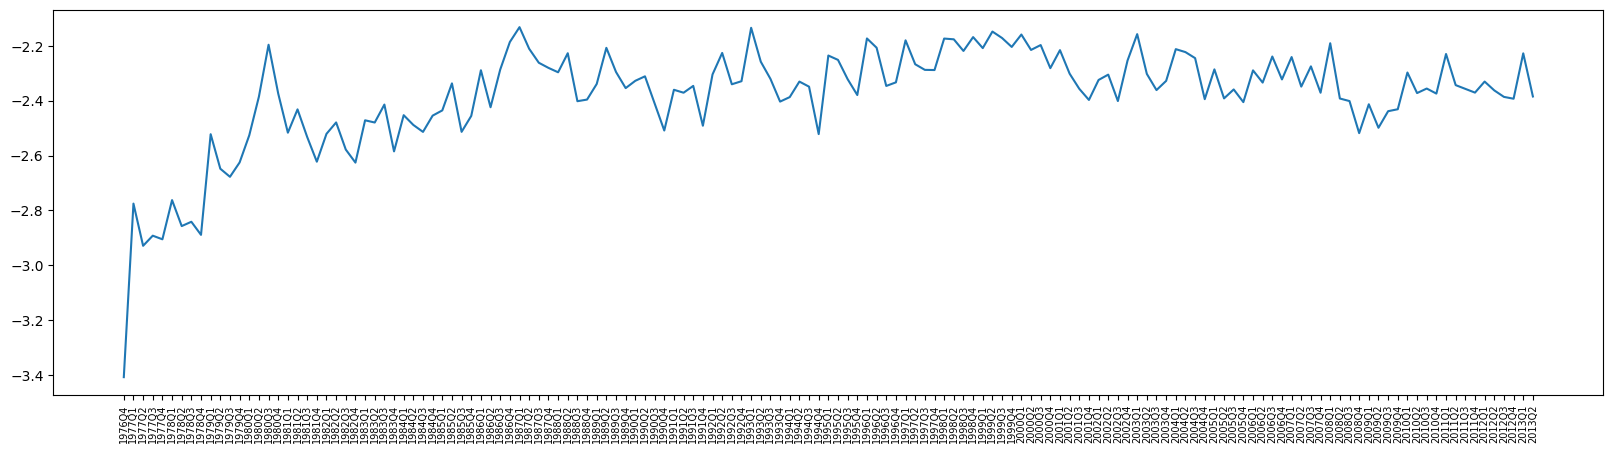

In [325]:
plt.figure(figsize=(20,5))
plt.plot(plot_m.index, plot_m["M-Score"], linestyle='-', label="M-Score")
plt.xticks(rotation=90, fontsize=7)

### From here on, I'm trying to match the gkey to tickers so I will be able to get market cap. M_score4.csv was previously the final version of our M Score data.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
my_M = pd.read_csv("M_score4.csv")
my_M.info()

Key Company Ticker  Year        Date Quarter   M-Score
0  1115     NaN    NaN  1982   3/31/1982  1982Q1 -2.560610
1  1115     NaN    NaN  1982   6/30/1982  1982Q2 -2.553592
2  1115     NaN    NaN  1982   9/30/1982  1982Q3 -3.468174
3  1115     NaN    NaN  1982  12/31/1982  1982Q4 -1.455851
4  1115     NaN    NaN  1983   3/31/1983  1983Q1 -2.780615

In [93]:
#dropping rows where M-Score is null, because they are very few and belong to companies where all the M-Scores are null, so there is no backfilling
#my_M[my_M["M-Score"].isna()]
my_M.dropna(axis=0, subset=["M-Score"], inplace=True)

In [94]:
my_M.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42269 entries, 0 to 42277
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Key      42269 non-null  int64  
 1   Company  41882 non-null  object 
 2   Ticker   41179 non-null  object 
 3   Year     42269 non-null  int64  
 4   Date     42269 non-null  object 
 5   Quarter  42269 non-null  object 
 6   M-Score  42269 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.6+ MB


In [21]:
len(my_M.Year.unique())

38

(array([   3.,  177.,  232.,  242.,  254.,  433.,  575.,  620.,  682.,
         787.,  907.,  959., 1012., 1047., 1045., 1122., 1220., 1273.,
        1351., 1482., 1635., 1654., 1781., 1903., 1856., 1729., 1641.,
        1599., 1530., 1513., 1484., 1442., 1345., 1287., 1306., 1264.,
        1268.,  618.]),
 array([1976.        , 1976.97368421, 1977.94736842, 1978.92105263,
        1979.89473684, 1980.86842105, 1981.84210526, 1982.81578947,
        1983.78947368, 1984.76315789, 1985.73684211, 1986.71052632,
        1987.68421053, 1988.65789474, 1989.63157895, 1990.60526316,
        1991.57894737, 1992.55263158, 1993.52631579, 1994.5       ,
        1995.47368421, 1996.44736842, 1997.42105263, 1998.39473684,
        1999.36842105, 2000.34210526, 2001.31578947, 2002.28947368,
        2003.26315789, 2004.23684211, 2005.21052632, 2006.18421053,
        2007.15789474, 2008.13157895, 2009.10526316, 2010.07894737,
        2011.05263158, 2012.02631579, 2013.        ]),
 <BarContainer object of 

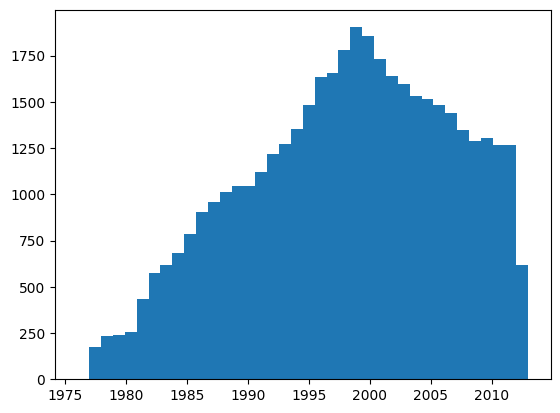

In [25]:
#my_M.Year.hist(bins=38, grid=False)
plt.hist(x=my_M.Year, bins=38)

In [8]:
no_info_key = []
keys_m3 = my_M["Key"].unique()

for i in keys_m3:
    k_df = comp_m_df(my_M, i)
    if k_df["Ticker"].isnull().all() and k_df["Company"].isnull().all():
        no_info_key.append(i)


print("There are ", len(no_info_key), "companies/keys that have no identifying data i.e. Ticker or Company name.")
no_info_key

In [13]:
len(my_M.Key.unique())

998

In [100]:
key_index = pd.read_csv("gvkey_index2.csv")
key_index.drop(["gvkeyx", "conm", "tic", "from", "thru"], axis=1, inplace=True) #most of these columns are completely empty
key_index.head()

gvkey                      co_conm co_tic  co_sic
0   5047          GENERAL ELECTRIC CO     GE    9997
1   5073            GENERAL MOTORS CO     GM    3711
2   9563           SEARS ROEBUCK & CO    S.1    5311
3   1300  HONEYWELL INTERNATIONAL INC    HON    9997
4  10857           UNION CARBIDE CORP   DOW2    2860

In [18]:
#no nulls, lovely
key_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gvkey    606 non-null    int64 
 1   co_conm  606 non-null    object
 2   co_tic   606 non-null    object
 3   co_sic   606 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 19.1+ KB


In [19]:
#500 keys in the index dataset, but we have 993 unique keys in the m score dataset
len(key_index.gvkey.unique())

500

In [32]:
#making lists of id info for the keys we need them for
#no_info_key
no_info_tickers = []
no_info_names = []

for i in no_info_key:
    if key in key_index.gvkey.unique():
        no_info_tickers.append(key_index[key_index.Key == key].co_tic)
        no_info_names.append(key_index[key_index.Key == key].co_conm)


In [30]:
#None of the keys with no id info are in the key data set..... may have to exclude them or find another source
no_info_tickers

[]

In [39]:
# this table is from the Compustat Snapshot database that had the M-Score variables,this is just the ID columns
compu_id = pd.read_csv("M_ID.csv")
compu_id.drop(["datadate"], axis=1, inplace=True)
compu_id.drop_duplicates(inplace=True)
compu_id.head()

gvkey                        conm  cik     sic  naics  iid    tic  \
0    1018                         NaN  NaN     NaN    NaN  NaN    NaN   
21   1018  AES TECHNOLOGY SYSTEMS INC  NaN  3861.0    NaN   01  2938B   
27   1049                         NaN  NaN     NaN    NaN  NaN    NaN   
35   1070                         NaN  NaN     NaN    NaN  NaN    NaN   
65   1095                         NaN  NaN     NaN    NaN  NaN    NaN   

        cusip sedol isin  exchg  
0         NaN   NaN  NaN    NaN  
21  001032101   NaN  NaN    1.0  
27        NaN   NaN  NaN    NaN  
35        NaN   NaN  NaN    NaN  
65        NaN   NaN  NaN    NaN

In [41]:
#only keep rows that have at least one id variable
id_cols = compu_id.columns[1:10]
no_id_info = compu_id[id_cols].isnull().apply(lambda x: all(x), axis=1)
compu_id = compu_id[~no_id_info]
compu_id.head()

gvkey                         conm  cik     sic  naics iid    tic  \
21   1018   AES TECHNOLOGY SYSTEMS INC  NaN  3861.0    NaN  01  2938B   
88   1095  ACKERLEY COMMUNICATIONS INC  NaN  7311.0    NaN  01  4060B   
93   1095  ACKERLEY COMMUNICATIONS INC  NaN  7310.0    NaN  01  4060B   
94   1095  ACKERLEY COMMUNICATIONS INC  NaN  7310.0    NaN  01  ACMIC   
99   1095  ACKERLEY COMMUNICATIONS INC  NaN  7310.0    NaN  01     AK   

        cusip sedol isin  exchg  
21  001032101   NaN  NaN    1.0  
88  004527107   NaN  NaN    1.0  
93  004527107   NaN  NaN    1.0  
94  004527107   NaN  NaN   14.0  
99  004527107   NaN  NaN   12.0

In [56]:
#dataframe with rows without ID data
#no_info_key
no_info_tickers = []
no_info_names = []
count_id = 0
for i in no_info_key:
    if i in compu_id.gvkey.unique():
        print(i)
        count_id += 1
        no_info_tickers.append(compu_id[compu_id.gvkey == i]["tic"])
        no_info_names.append(compu_id[compu_id.gvkey == i]["conm"])
count_id

15434
65790


2

In [73]:
#no_info_names
#no_infor_tickers

[41926    AEGIS INDS INC
 Name: conm, dtype: object,
 61514    BARBEQUES GALORE LTD  -ADR
 61521    BARBEQUES GALORE LTD  -ADR
 61525    BARBEQUES GALORE LTD  -ADR
 Name: conm, dtype: object]

In [74]:
#we only found information for two companies with this data set
my_M[my_M["Key"] == 15434] = my_M[my_M["Key"] == 15434].assign(Company = "AEGIS INDS INC", Ticker="AGISD")
my_M[my_M["Key"] == 65790] = my_M[my_M["Key"] == 65790].assign(Company = "BARBEQUES GALORE LTD  -ADR", Ticker="BBQZ")


In [76]:
#my_M[my_M["Key"] == 15434]
#my_M[my_M["Key"] == 65790]

Key                     Company Ticker  Year       Date Quarter  \
32302  65790  BARBEQUES GALORE LTD  -ADR   BBQZ  1996  6/30/1996  1996Q2   

        M-Score  
32302 -2.516922

In [95]:
no_info_key2 = []
keys_m3 = my_M["Key"].unique()

for i in keys_m3:
    k_df = comp_m_df(my_M, i)
    if k_df["Ticker"].isnull().all() and k_df["Company"].isnull().all():
        no_info_key2.append(i)


print("There are now ", len(no_info_key2), " out of ", len(keys_m3), "companies/keys that have no identifying data i.e. Ticker or Company name.")
#no_info_key2

There are now  70  out of  993 companies/keys that have no identifying data i.e. Ticker or Company name.


In [82]:
my_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42278 entries, 0 to 42277
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Key      42278 non-null  int64  
 1   Company  33270 non-null  object 
 2   Ticker   32318 non-null  object 
 3   Year     42278 non-null  int64  
 4   Date     42278 non-null  object 
 5   Quarter  42278 non-null  object 
 6   M-Score  42269 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.3+ MB


In [84]:
my_M.head(25)

Key            Company Ticker  Year        Date Quarter   M-Score
0   1115                NaN    NaN  1982   3/31/1982  1982Q1 -2.560610
1   1115                NaN    NaN  1982   6/30/1982  1982Q2 -2.553592
2   1115                NaN    NaN  1982   9/30/1982  1982Q3 -3.468174
3   1115                NaN    NaN  1982  12/31/1982  1982Q4 -1.455851
4   1115                NaN    NaN  1983   3/31/1983  1983Q1 -2.780615
5   1115                NaN    NaN  1983   6/30/1983  1983Q2 -2.680164
6   1115                NaN    NaN  1983   9/30/1983  1983Q3 -2.159354
7   1115                NaN    NaN  1983  12/31/1983  1983Q4 -3.033544
8   1115                NaN    NaN  1984   3/31/1984  1984Q1 -2.810316
9   1115                NaN    NaN  1984   6/30/1984  1984Q2 -2.810316
10  1115                NaN    NaN  1984   9/30/1984  1984Q3 -2.755353
11  1115                NaN    NaN  1984  12/31/1984  1984Q4 -3.842452
12  1115                NaN    NaN  1985   3/31/1985  1985Q1 -2.714453
13  1115                NaN    NaN  1985   6/30/1985  1985Q2 -2.714453
14  1115                NaN    NaN  1985   9/30/1985  1985Q3 -2.714453
15  1115                NaN    NaN  1985  12/31/1985  1985Q4 -2.714453
16  1115                NaN    NaN  1986   3/31/1986  1986Q1 -2.714453
17  1115                NaN    NaN  1986   6/30/1986  1986Q2 -2.714453
18  1115                NaN    NaN  1986   9/30/1986  1986Q3 -3.337769
19  1115  ADAC LABORATORIES   ADAC  1986  12/31/1986  1986Q4 -3.337769
20  1115  ADAC LABORATORIES   ADAC  1987   3/31/1987  1987Q1 -3.305501
21  1115  ADAC LABORATORIES   ADAC  1987   6/30/1987  1987Q2 -3.305501
22  1115  ADAC LABORATORIES   ADAC  1987   9/30/1987  1987Q3 -3.305501
23  1115  ADAC LABORATORIES   ADAC  1987  12/31/1987  1987Q4 -2.380438
24  1115  ADAC LABORATORIES   ADAC  1988   3/31/1988  1988Q1 -2.496438

In [96]:
#need to backfill some of the ticker and company names
new_my_M = my_M
new_my_M.Company = my_M.groupby(['Key']).Company.bfill()
new_my_M.Ticker = my_M.groupby(['Key']).Ticker.bfill()

In [97]:
new_my_M.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42269 entries, 0 to 42277
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Key      42269 non-null  int64  
 1   Company  41882 non-null  object 
 2   Ticker   41179 non-null  object 
 3   Year     42269 non-null  int64  
 4   Date     42269 non-null  object 
 5   Quarter  42269 non-null  object 
 6   M-Score  42269 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.6+ MB


In [99]:
#M_score5 updates the name and ticker for the two companies that we could get info for, and also does not have the null M-Scores
my_M.to_csv('M_score5.csv', encoding='utf-8', index=False,header=True)

In [98]:
#M_score6 has backfilled info for the info that we do have
new_my_M.to_csv('M_score6.csv', encoding='utf-8', index=False,header=True)

### The final CSV file, called M_score6.csv, has the quarterly M-Score for 993 companies, with each having a varying range of dates. There are 70 that have no identifiers other than their gvkey. I have not been able to find their Ticker, name, or any other key to ID them. 